Loading in the packages I will use

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Reading in the data

In [2]:
suicide = pd.read_csv('who_suicide_statistics.csv')
len(suicide)
suicide.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


There are several observations that have missing values for suicides_no and population so we can impute them with the mean for those columns.

In [3]:
suicide['suicides_no'] = suicide['suicides_no'].fillna(suicide['suicides_no'].mean())
suicide['population'] = suicide['population'].fillna(suicide['population'].mean())

We can describe the quantitative data by looking at the mean, percentiles, and other descriptive statistics.

In [4]:
suicide.describe()

,year,suicides_no,population
count,43776.000000,43776.000000,4.377600e+04
mean,1998.502467,193.315390,1.664091e+06
std,10.338711,779.687346,3.412201e+06
min,1979.000000,0.000000,2.590000e+02
25%,1990.000000,1.000000,1.184982e+05
50%,1999.000000,17.000000,5.177775e+05
75%,2007.000000,124.000000,1.664091e+06
max,2016.000000,22338.000000,4.380521e+07


We can observe how correlated suicides_no and population are. I'm guessinsg they would be pretty strongly correlated because I think bigger populations would have higher amounts of suicide.

In [5]:
suicide.corr()

,year,suicides_no,population
year,1.000000,-0.011369,0.025564
suicides_no,-0.011369,1.000000,0.599144
population,0.025564,0.599144,1.000000


We can also look at the relationship between suicides_no and population with a scatterplot. In the plot we observe a positive relationship meaning that as the population increases, the number of suicides increases.

Text(0.5, 1.0, 'Number of Suicides by Population Size')

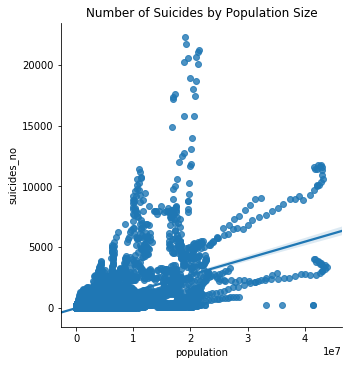

In [6]:
sns.lmplot('population', 'suicides_no', data = suicide)
plt.title('Number of Suicides by Population Size')

We can also look at the relationship between sex and the number of suicides. The average number of males  who commit suicide is a lot larger than the average number of females who commit suicide. This tells us that there is probably something different about males and females that causes a higher number of suicides in males. In the future we may want to incorporate more data by gender to determine what could be the cause of this.

In [7]:
suicide.groupby(['sex'])['suicides_no'].mean()

sex
female     96.871882
male      289.758898
Name: suicides_no, dtype: float64

Text(0.5, 1.0, 'Number of Suicides by Sex')

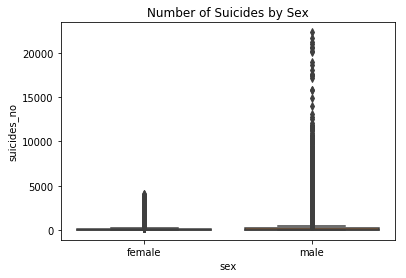

In [8]:
sns.boxplot(x = 'sex', y = 'suicides_no', data = suicide)
plt.title('Number of Suicides by Sex')

This graph is hard to interpret because the outliers extend so far up. We will limit our data to only include suicide values below 500 so that we can make sense of this plot

Text(0.5, 1.0, 'Number of Suicides by Sex')

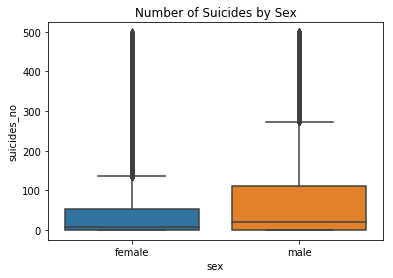

In [9]:
suicide_500 = suicide[suicide['suicides_no'] < 500]
sns.boxplot(x = 'sex', y = 'suicides_no', data = suicide_500)
plt.title('Number of Suicides by Sex')

This plot supports what we found above in that the average number of suicides is quite a bit higher for males than for females. We note the averages for males and females are both lower in the plot than indicated above because we dropped out the higher observations for graphical convenice. Even though there means are lower, we can still se that males look like they have a much higher amount of suicides.

We can also look at the number of suicides by age group.

In [10]:
suicide.groupby(['age'])['suicides_no'].mean()

age
15-24 years    144.870283
25-34 years    197.371106
35-54 years    406.808469
5-14 years      18.640157
55-74 years    278.392898
75+ years      113.809428
Name: suicides_no, dtype: float64

We see that the 35-54 has the highest average by far. We can look at this visually with side by side boxplots using our 500 cap for suicides again.

Text(0.5, 1.0, 'Number of Suicides by Age Group')

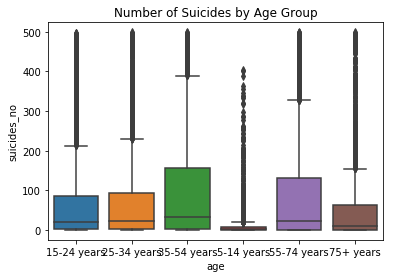

In [11]:
sns.boxplot(x = 'age', y = 'suicides_no', data = suicide_500)
plt.title('Number of Suicides by Age Group')

We again note that the average number of suicdes is lower for each group because we are only including entries where the number of suicides is less than 500 which drags down the average. The shape of the data is still the same, though, as we can see that the 35-54 year olds have the highest number of suicidies, followed by the 55-74 year olds, and so on. This tells us that there is probably something about middle-aged people that causes them to commit suicide more than people of other ages. We could grab more factors to analyze what could be causing this.